# Lab 01

> In this lab, you're going to:

1.   Implement your your first reinforcement learning agent
2.   Study about the reinforcement learning dilemma of exploration and exploitation
3.   Create simple plot to visualize your agent's efficiencies






**In this lab, and the next one, we're going to use a game simulator of GridWorld**

What is GridWorld

GridWorld game is basically a **grid map** of size (m x m)
in which there're grid boxes you are rewarded with  

*   ***positive*** value when you step in
*   ***negative*** value when you step in

The purpose of this game is to find a policy that guides your agent to avoid **negative** boxes and find **positive** ones.

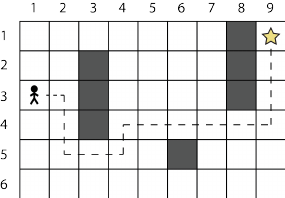

## Gridworld Simulator

This part, we're going to build the simulator, if you wish to understand what the environment you're dealing with does, you might want to take a look.

If you're not very interested, you can pass this section and move on. But **make sure you run all the blocks in this section at least once to activate the source code of the game**

In [1]:
# In this simulator, all is done with a simple module: numpy
import numpy as np

In [2]:
class environment:
  def __init__(self, grid_height, grid_width):
    """
    The map is initialized with height and width are varible of your choice
    start: List of location where you step in, you get to the corresponding location in list 'end'
           For example:
              if you step in location start[3] then you get to new location end[3] then obtain the reward value of reward[3]
    reward: List of reward value where you move from a location in 'start' list to the corresponding location in 'end' list
    """
    self.height = grid_height
    self.width = grid_width
    self.start = []
    self.end = []
    self.reward = []
    self.map = np.array([i for i in range(grid_height * grid_width)])
    self.action_space = [0,1,2,3]

  def get_Map(self):
    print(self.map.reshape([self.width, self.height]))

  def get_NumState(self):
    return self.height * self.width

  def map_Designate(self, start_cell, end_cell, reward):
    self.start.append(start_cell)
    self.end.append(end_cell)
    self.reward.append(reward)

  def get_Observation(self, location, action):
    # If the agent observe the environment the first time
    if location in self.start:
      idx = self.start.index(location)
      new_location = self.end[idx]
      reward = self.reward[idx]
      return new_location, self.action_space, reward\

    # If the agent at special locations, all action lead to a single location, gain reward
    if location in self.start:
      idx = self.start.index(location)
      new_location = self.end[idx]
      reward = self.reward[idx]
      return new_location, self.action_space, reward

    # If the agent not at special locations, reward = 0
    reward = 0
    # Action: UP: 0, DOWN: 1, LEFT: 2, RIGHT: 3
    # Actions that get the agent out of the map, result in no change at all
    if action == 0: #UP
      if location - self.width < 0:
        new_location = location
      else:
        new_location = location - self.width

    elif action == 1: #DOWN
      if location + self.width > self.height * self.width - 1:
        new_location = location
      else:
        new_location = location + self.width

    elif action == 2: #LEFT
      if location % self.width == 0:
        new_location = location
      else:
        new_location = location - 1

    elif action == 3: #RIGHT
      if (location + 1) % self.width == 0:
        new_location = location
      else:
        new_location = location + 1

    return new_location, self.action_space, reward

> **Building a map**

Use our coded map if you want, or feel free to make changes

In [3]:
#Environment setup
Envir = environment(8,8)
Envir.get_Map()
Envir.map_Designate(17,56,-15)
Envir.map_Designate(18,56,-15)
Envir.map_Designate(19,56,-15)
Envir.map_Designate(21,56,-15)
Envir.map_Designate(25,56,-15)
Envir.map_Designate(33,56,-15)
Envir.map_Designate(41,56,-15)
Envir.map_Designate(42,56,-15)
Envir.map_Designate(43,56,-15)
Envir.map_Designate(46,56,-15)
Envir.map_Designate(47,56,-15)
Envir.map_Designate(47,56,-15)
Envir.map_Designate(15,56,+15)
Envir.map_Designate(1,10,+5)
Envir.map_Designate(26,56,+20)

# Check for the start, end, reward lists
for i in range(len(Envir.start)):
  print('i = '+ str(i) + '|Start at ' + str(Envir.start[i]) + ' results at ' + str(Envir.end[i]) + ' get Reward: ' + str(Envir.reward[i]))

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55]
 [56 57 58 59 60 61 62 63]]
i = 0|Start at 17 results at 56 get Reward: -15
i = 1|Start at 18 results at 56 get Reward: -15
i = 2|Start at 19 results at 56 get Reward: -15
i = 3|Start at 21 results at 56 get Reward: -15
i = 4|Start at 25 results at 56 get Reward: -15
i = 5|Start at 33 results at 56 get Reward: -15
i = 6|Start at 41 results at 56 get Reward: -15
i = 7|Start at 42 results at 56 get Reward: -15
i = 8|Start at 43 results at 56 get Reward: -15
i = 9|Start at 46 results at 56 get Reward: -15
i = 10|Start at 47 results at 56 get Reward: -15
i = 11|Start at 47 results at 56 get Reward: -15
i = 12|Start at 15 results at 56 get Reward: 15
i = 13|Start at 1 results at 10 get Reward: 5
i = 14|Start at 26 results at 56 get Reward: 20


## Agent designation


In this section, you're building your first reinforcement learning agent. The basic function that all agent is required to have is **getAction** (or **takeAction** if you want some intensities in your work :v)


---


Such function has one input: **observation** (or **the current state**), in this particular situation of interest, we have another information: **reward** (of the previous taken action).

So observation is a tupple (current state, previous reward) which you can extract simply by:

```
location_now, _, pre_reward = observation
```

This function returns th action you wish to execute, in this particular environment, the action space is **{0, 1, 2, 3}** which are UP, DOWN, LEFT and RIGHT respectively

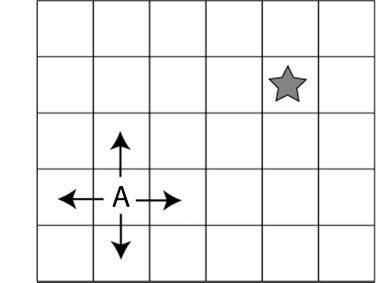

```
def getAction(self, observation):
  location_now, action_space, pre_reward = observation
  # your code
  action = ...

  # make sure your action is valid
  assert action in action_space, "INVALID action taken"
  return action
```



> **In real-world problems, the reward is deduced from the current state and not pre-defined by the environment, which helps our agent to maximize whatever we want. Great isn't it ?**




**NOTICE**: If you're not familiar with "MAB agent" then please come back when you are because we're not going to revise fundamentals in labs

In [11]:
class MAB_agent:
  def __init__(self, envir, init_location):
    # Trace the reward
    self.reward_trace = []
    # initialize the first location
    self.location_now = init_location
    # TODO: implement other features to the agent so it can perform MAB algorithm
    self.lastAction = None
    self.lastState = None
    self.value_table = {}    # format: {state : {action : [value, count]}}

  def get_TotalReward(self):
    return np.sum(self.reward_trace)

  # Running in Simulator
  def getAction(self, observation):
    location_now, action_space, pre_reward = observation
    # NOTICE: the first observation is (None, [0,1,2,3], None)
    # You should process the 'None' value
    if self.location_now not in self.value_table.keys():
      # if the state has not been observed before, add to the table with [value, count] = [0, 1]
      self.value_table[self.location_now] = {i: [0, 1] for i in action_space}

    if pre_reward is None:
      action = np.random.choice(action_space, p=[1/(len(action_space)) for action in action_space])
    else:
      self.reward_trace.append(pre_reward)
      # Updating with incremental average over reward samples
      value = self.value_table[self.lastState][self.lastAction][0]
      count = self.value_table[self.lastState][self.lastAction][1]

      count += 1
      value += (1/count) * (pre_reward - value)

      self.value_table[self.lastState][self.lastAction][0] = value
      self.value_table[self.lastState][self.lastAction][1] = count

      # get action
      state_dict = self.value_table[self.lastState].values()
      state_dict_array = np.array(list(state_dict))
      value_column = state_dict_array[:,0]
      action = np.argmax(value_column)

    self.lastState = self.location_now
    self.lastAction = action
    # Assert valid action
    assert action in action_space, "INVALID action taken"
    return action

In [12]:
# create your agent, with environment is the pre-declared Envir and init_location set to 0
init_location = 0
dummyAgent = MAB_agent(envir=Envir, init_location=init_location)

num_iter = 100

log_freq = 10
Data_plot1 = []

for i in range(num_iter):
  env_observation = (init_location, Envir.action_space, None)
  if i > 0:
    env_observation = Envir.get_Observation(location=dummyAgent.location_now, action=chosen_action)

  chosen_action = dummyAgent.getAction(observation=env_observation)
  if (i + 1) % log_freq == 0:
    aver = np.mean(dummyAgent.reward_trace)
    Data_plot1.append(aver)
    print('iter: ' + str(i + 1) + '\t Total reward: ' + str(dummyAgent.get_TotalReward()) + '\t Average: ' + str(aver))

iter: 10	 Total reward: 0	 Average: 0.0
iter: 20	 Total reward: 0	 Average: 0.0
iter: 30	 Total reward: 0	 Average: 0.0
iter: 40	 Total reward: 0	 Average: 0.0
iter: 50	 Total reward: 0	 Average: 0.0
iter: 60	 Total reward: 0	 Average: 0.0
iter: 70	 Total reward: 0	 Average: 0.0
iter: 80	 Total reward: 0	 Average: 0.0
iter: 90	 Total reward: 0	 Average: 0.0
iter: 100	 Total reward: 0	 Average: 0.0


##  Exploration and Exploitation: Reinforcement Learning Dilemma

In this section, you'll study how exploration can effectively improve the overall reward of your agent. Also, learn the trade-off between explore and exploit.

First, take a look at the most basic form of exploration:
$\epsilon$-greedy

> The idea is simple, for each timestep where we consider which action to take, there is a probability of $\epsilon$ that you take a random action, and $1-\epsilon$ that you take the highest-rewarded action


How we implement this idea, as black and white as the idea!



```
rand_num = np.random.randn()
if rand_num <= epsilon:
  action = # random action
else:
  action = # action with highest reward
```



In [13]:
class MABe_agent(MAB_agent):
  def __init__(self, envir, init_location, epsilon):
    super(MABe_agent, self).__init__(envir, init_location)
    self.epsilon = epsilon

  # Override
  def getAction(self, observation):
    location_now, action_space, pre_reward = observation
    # NOTICE: the first observation is (NONE, [0,1,2,3], None)
    # You should process the 'None' value
    if self.location_now not in self.value_table.keys():
      # if the state has not been observed before, add to the table with [value, count] = [0, 1]
      self.value_table[self.location_now] = {i: [0, 1] for i in action_space}

    toss = np.random.rand()

    if pre_reward is None or toss < self.epsilon:
      action = np.random.choice(action_space, p=[1/(len(action_space)) for action in action_space])
    else:
      self.reward_trace.append(pre_reward)
      # Updating with incremental average over reward samples
      value = self.value_table[self.lastState][self.lastAction][0]
      count = self.value_table[self.lastState][self.lastAction][1]

      count += 1
      value += (1/count) * (pre_reward - value)

      self.value_table[self.lastState][self.lastAction][0] = value
      self.value_table[self.lastState][self.lastAction][1] = count

      # get action
      state_dict = self.value_table[self.lastState].values()
      state_dict_array = np.array(list(state_dict))
      value_column = state_dict_array[:,0]
      action = np.argmax(value_column)

    self.lastState = self.location_now
    self.lastAction = action
    # Assert valid action
    assert action in action_space, "INVALID action taken"
    return action


In [15]:
# Run your MABe agent
# create your agent, with environment is the pre-declared Envir and init_location set to 0
init_location = 0
epsilon=0.5
dummyAgent = MABe_agent(envir=Envir, init_location=init_location, epsilon=epsilon)

num_iter = 1000
log_freq = 100
Data_plot2 = []
Action_record = []
Location_record = []

for i in range(num_iter):
  env_observation = (init_location, Envir.action_space, None)
  if i > 0:
    env_observation = Envir.get_Observation(location=dummyAgent.location_now, action=chosen_action)

  chosen_action = dummyAgent.getAction(observation=env_observation)
  Location_record.append(env_observation[0])
  Action_record.append(chosen_action)

  if (i + 1) % log_freq == 0:
    aver = np.mean(dummyAgent.reward_trace)
    Data_plot2.append(aver)
    print('iter: ' + str(i + 1) + '\t Total reward: ' + str(dummyAgent.get_TotalReward()) + '\t Average: ' + str(aver))

iter: 100	 Total reward: 0	 Average: 0.0
iter: 200	 Total reward: 0	 Average: 0.0
iter: 300	 Total reward: 0	 Average: 0.0
iter: 400	 Total reward: 0	 Average: 0.0
iter: 500	 Total reward: 0	 Average: 0.0
iter: 600	 Total reward: 0	 Average: 0.0
iter: 700	 Total reward: 0	 Average: 0.0
iter: 800	 Total reward: 0	 Average: 0.0
iter: 900	 Total reward: 0	 Average: 0.0
iter: 1000	 Total reward: 0	 Average: 0.0


## Simulation

After defined environment and agent class, we need to combine these elements to perform simulation

## Simple plot with matplotlib



> Visualization is the best way for data analysis

In this section, we're going to plot your data



In [16]:
import matplotlib.pyplot as plt

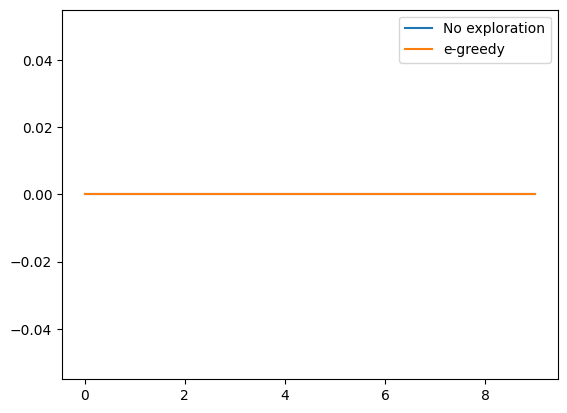

In [17]:
fig = plt.figure()
plt.plot(Data_plot1, label="No exploration")
plt.plot(Data_plot2, label="e-greedy")
plt.legend()
plt.show()